In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('processed_data/tas_history.csv')

electorate_dict = {'Bass': 'tab:blue',
                   'Braddon': 'tab:orange',
                   'Clark': 'tab:green',
                   'Franklin': 'tab:red',
                   'Lyons': 'tab:purple'}

# Multi-member electorates

## Senate

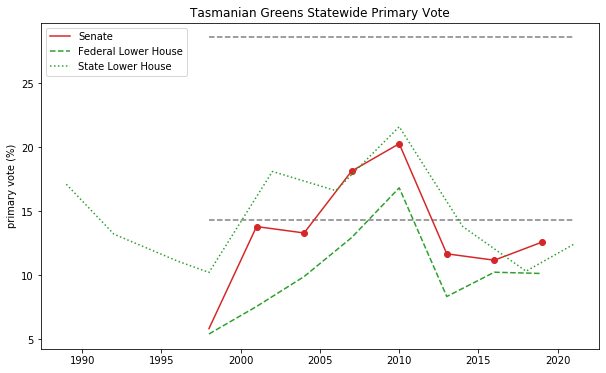

In [4]:
plt.figure(figsize=[10, 6])

senate_df = df[(df['Election'] == 'Federal') & (df['Electorate'] == 'Senate')].sort_values(by=['Year'])
plt.plot(senate_df['Year'].values, senate_df['Primary vote'].values, label='Senate', color='tab:red')
result_df = senate_df[senate_df['Seats'] > 0]
plt.scatter(result_df['Year'].values, result_df['Primary vote'].values, color='tab:red')

lower_df = df[(df['Election'] == 'Federal') & (df['Electorate'] == 'Tasmania')].sort_values(by=['Year'])
plt.plot(lower_df['Year'].values, lower_df['Primary vote'].values, label='Federal Lower House', color='tab:green', linestyle='--')

state_df = df[(df['Election'] == 'State') & (df['Electorate'] == 'Tasmania')].sort_values(by=['Year'])
plt.plot(state_df['Year'].values, state_df['Primary vote'].values, label='State Lower House', color='tab:green', linestyle=':')

plt.hlines(14.29, 1998, 2021, colors='0.5', linestyles='dashed')
plt.hlines(14.29*2, 1998, 2021, colors='0.5', linestyles='dashed')
plt.title('Tasmanian Greens Statewide Primary Vote')
plt.ylabel('primary vote (%)')
plt.legend(loc=2)
plt.savefig('statewide_vote.png', dpi=300, bbox_inches='tight')

**Figure.** Tasmanian Greens statewide primary vote at state and federal elections. Dashed lines indicate a senate quota and dots indicate that a Greens senator (or two in the case of the 2016 double dissolution election) was elected.

## State elections

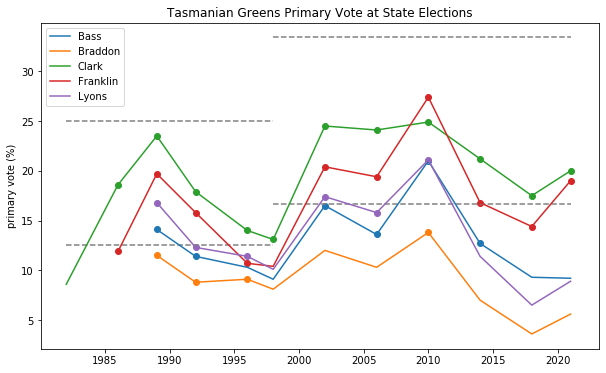

In [5]:
plt.figure(figsize=[10, 6])

for electorate, color in electorate_dict.items():
    data_df = df[(df['Election'] == 'State') & (df['Electorate'] == electorate)].sort_values(by=['Year'])
    plt.plot(data_df['Year'].values, data_df['Primary vote'].values, label=electorate, color=color)
    result_df = data_df[data_df['Seats'] > 0]
    plt.scatter(result_df['Year'].values, result_df['Primary vote'].values, color=color)
    
plt.hlines(16.7, 1998, 2021, colors='0.5', linestyles='dashed')
plt.hlines(12.5, 1982, 1998, colors='0.5', linestyles='dashed')
plt.hlines(16.7*2, 1998, 2021, colors='0.5', linestyles='dashed')
plt.hlines(12.5*2, 1982, 1998, colors='0.5', linestyles='dashed')
plt.title('Tasmanian Greens Primary Vote at State Elections')
plt.ylabel('primary vote (%)')
plt.legend(loc=2)
plt.savefig('state_elections.png', dpi=300, bbox_inches='tight')

**Figure.** Greens primary vote at Tasmanian state elections. Dashed lines indicate a quota and dots indicate that a Green candidate was elected.

# Single member electorates

## Federal elections

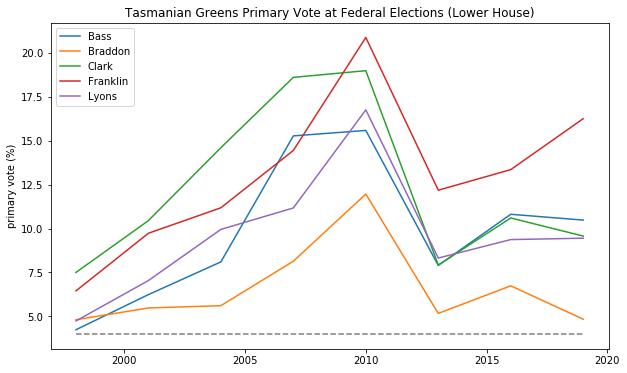

In [6]:
plt.figure(figsize=[10, 6])

for electorate, color in electorate_dict.items():
    data_df = df[(df['Election'] == 'Federal') & (df['Electorate'] == electorate)].sort_values(by=['Year'])
    plt.plot(data_df['Year'].values, data_df['Primary vote'].values, label=electorate, color=color)
    
plt.hlines(4.0, 1998, 2019, colors='0.5', linestyles='dashed')
plt.title('Tasmanian Greens Primary Vote at Federal Elections (Lower House)')
plt.ylabel('primary vote (%)')
plt.legend(loc=2)
plt.savefig('federal_elections.png', dpi=300, bbox_inches='tight')

**Figure.** Tasmanian Greens primary vote at federal elections (lower house). Dashed lines indicate the threshold for AEC funding.